## 非钓鱼节点分析

In [1]:
import pandas as pd 
import os 

In [2]:
pwd = os.getcwd()
print(pwd)

x:\Datasets\Blockchain\xblock.pro\Phishing


In [3]:

count = 0
data = {}

for file in os.listdir(pwd + "/非钓鱼一阶节点/"):
    if file.endswith(".csv"):
        df = pd.read_csv(pwd + "/非钓鱼一阶节点/" + file)
        if len(df) > 50:
            # 按照时间戳进行排序
            df = df.sort_values(by='TimeStamp')
            df['is_out'] = df['From'] == file.split('.')[0]
            df['tx_value'] = df['Value'] * df['is_out'].apply(lambda x: -1 if x else 1)
            # 账户余额的变化
            df['balance'] = df['tx_value'].cumsum()
            data[file.split('.')[0]] = df

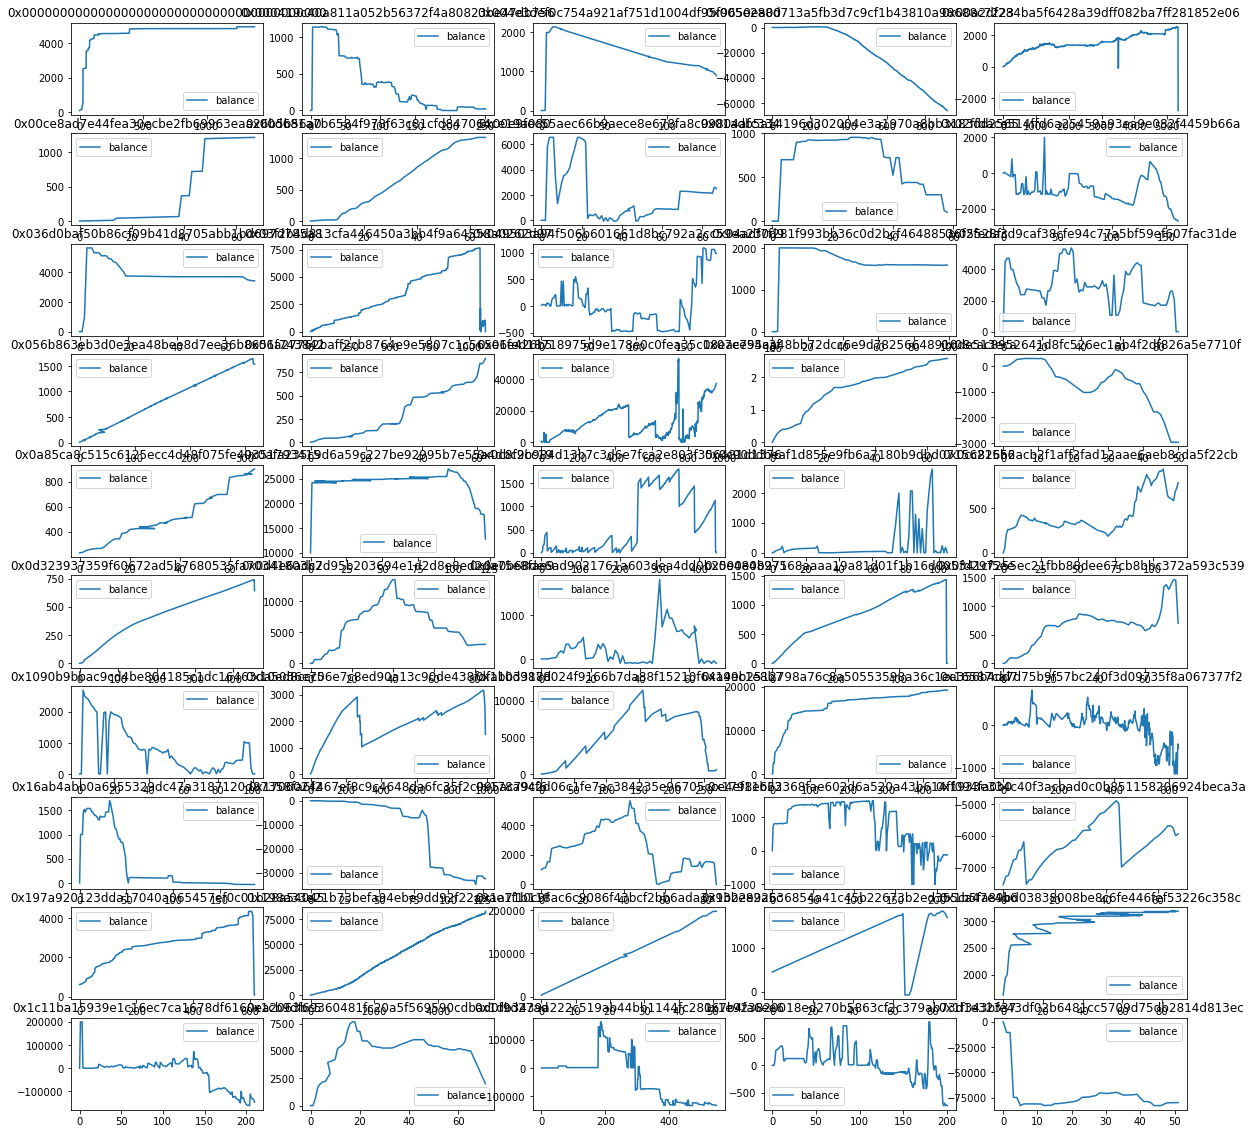

In [4]:
# 画data中datafram的balance的变化图, 画再不同的子图上
import matplotlib.pyplot as plt

# 共画30张子图
subgraph_num = 50

# 一行画6张子图
row_num = 10

# 一列画5张子图
col_num = 5

# 画图的大小
fig_size = (20, 20)

fig, axes = plt.subplots(row_num, col_num, figsize=fig_size)
sub_data = {k: data[k] for k in list(data.keys())[:subgraph_num]}

for i, (k, v) in enumerate(sub_data.items()):
    ax = axes[i // col_num, i % col_num]
    # 横坐标为index, 纵坐标为balance
    v.plot(y='balance', ax=ax)
    ax.set_title(k)

plt.show()
